# Traning an Image Classifier

In [20]:
import torch
import torchvision
import torchvision.transforms as transforms

In [21]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


In [22]:
classes = ["plane", "car", "birds", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

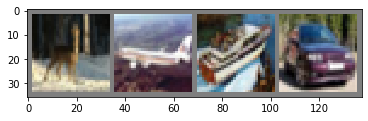

 deer plane  ship   car


In [23]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

In [24]:
import torch.nn as nn
import torch.nn.functional as F

In [25]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [26]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [27]:
from tqdm import tqdm

In [ ]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in tqdm(enumerate(trainloader, 0), total=len(trainloader)):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print("[%d, %5d] loss: %.3f" % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

In [ ]:
PATH = "./cifar_net.pth"
torch.save(net.state_dict(), PATH)

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print("GroundTruth: ", " ".join("%5s" % classes[labels[j]] for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)
print("Predicted: ", " ".join("%5s" % classes[predicted[j]] for j in range(4)) )

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(100 * correct / total)

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
for i in range(10):
    print(classes[i], 100 * class_correct[i] / class_total[i])

In [ ]:
device = torch.device("cuda: 0" if torch.cuda.is_available() else "cpu")
print(device)

In [ ]:
net_gpu = Net()
optimizer = optim.SGD(net_gpu.parameters(), lr=0.001, momentum=0.9)

In [ ]:
net_gpu.to(device)

In [ ]:
net_gpu.zero_grad()
optimizer.zero_grad()
for epoch in range(2):
    running_loss = 0.0
    for i, data in tqdm(enumerate(trainloader, 0), total=len(trainloader)):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net_gpu(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print("[%d, %5d] loss: %.3f" % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = net_gpu(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(100 * correct / total)

In [ ]:
torch.randn(3, 1, 2)

# Basic CNN

In [ ]:
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 20, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(20, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
device = torch.device("cuda: 0" if torch.cuda.is_available() else "cpu")
net_gpu = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_gpu.parameters(), lr=0.001, momentum=0.9)

net_gpu.to(device)

net_gpu.zero_grad()
optimizer.zero_grad()

is_running_loss_increased = False
prev_running_loss = float("inf")
epoch = 0
running_loss_avgs = []
training_errors = []
loss_all = []
while(1):
    total = 0
    correct = 0
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net_gpu(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        loss_all.append(loss.item())
        total += labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct += predicted.eq(labels).sum().item()
        
        if i % 2000 == 1999:
            running_loss_avg = running_loss / 2000
            training_error = 100 * (total - correct) / total
            print("[%d, %5d] loss: %.3f training error %.3f" 
                  % (epoch + 1, i + 1, running_loss_avg, training_error))
            running_loss_avgs.append(running_loss_avg)
            training_errors.append(training_error)
            
            if prev_running_loss < running_loss:
                is_running_loss_increased = True
                break
            prev_running_loss = running_loss
            total = 0
            correct = 0
            running_loss = 0.0
    if is_running_loss_increased:
        print(f"Tranining Done at Epoch: {epoch}")
        break
    epoch += 1

In [ ]:
plt.title("Training Error")
plt.plot(training_errors)
plt.show()

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = net_gpu(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(100 * correct / total)

# VGG19

In [30]:
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [31]:
transforms_train = transforms.Compose([
  transforms.RandomCrop(32, padding=4),
  transforms.RandomHorizontalFlip(),
  transforms.ToTensor(),
  transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
transforms_test = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
trainset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transforms_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=4)
testset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transforms_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


In [33]:
# Model structure referred
# from https://github.com/kuangliu/pytorch-cifar/blob/master/models/resnet.py

cfg = [64, 64, "P", 128, 128, "P", 256, 256, 256, 256, "P", 512, 512, 512, 512, "P", 512, 512, 512, 512, "P"]

class VGG19(nn.Module):
    def __init__(self, cfg):
        super(VGG19, self).__init__()
        self.layers = self._make_layers(cfg)
        self.fc = nn.Sequential(*[
            nn.Linear(512, 10)
        ])
#         self.fc = nn.Sequential(*[
#             nn.Dropout(),
#             nn.Linear(512, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(),
#             nn.Linear(4096, 4096),
#             nn.ReLU(inplace=True),
#             nn.Linear(4096, 10)
#         ])

    def _make_layers(self, cfg):
        layers = []
        in_channels = 3
        for x in cfg:
            if x == "P":
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels=in_channels, out_channels=x, kernel_size=3, padding=1),
                          nn.BatchNorm2d(x),
                          nn.ReLU(inplace=True)]
                in_channels = x
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = self.layers(x)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [35]:
# Training and testing codes referred 
# from https://github.com/dnddnjs/pytorch-cifar10/blob/master/resnet/train.py

device = 'cuda' if torch.cuda.is_available() else 'cpu'

net = VGG19(cfg=cfg)
net = net.to(device)
num_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
print('The number of parameters of model is', num_params)
# print(net)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, 
                      momentum=0.9, weight_decay=1e-4)

def train(epoch, global_steps):
    net.train()

    train_loss = 0
    correct = 0
    total = 0

    for batch_idx, (inputs, targets) in enumerate(train_loader):
        global_steps += 1
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = net(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    acc = 100 * correct / total
    print('train epoch : {} [{}/{}]| loss: {:.3f} | acc: {:.3f}'.format(
           epoch, batch_idx, len(train_loader), train_loss/(batch_idx+1), acc))

    return global_steps


def test(epoch, best_acc, global_steps):
    net.eval()

    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(test_loader):
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    acc = 100 * correct / total
    print('test epoch : {} [{}/{}]| loss: {:.3f} | acc: {:.3f}'.format(
           epoch, batch_idx, len(test_loader), test_loss/(batch_idx+1), acc))

    if acc > best_acc:
        best_acc = acc

    return best_acc

best_acc = 0
epoch = 0
global_steps = 0

while True:
    epoch += 1
    global_steps = train(epoch, global_steps)
    best_acc = test(epoch, best_acc, global_steps)
    print('best test accuracy is ', best_acc)

    if global_steps >= 64000:
        break


The number of parameters of model is 20040522
train epoch : 1 [390/391]| loss: 2.636 | acc: 10.086
test epoch : 1 [78/79]| loss: 2.315 | acc: 10.670
best test accuracy is  10.67
train epoch : 2 [390/391]| loss: 2.301 | acc: 10.468
test epoch : 2 [78/79]| loss: 2.301 | acc: 10.790
best test accuracy is  10.79
train epoch : 3 [390/391]| loss: 2.293 | acc: 11.570
test epoch : 3 [78/79]| loss: 2.256 | acc: 15.670
best test accuracy is  15.67
train epoch : 4 [390/391]| loss: 2.035 | acc: 19.834
test epoch : 4 [78/79]| loss: 1.882 | acc: 22.620
best test accuracy is  22.62
train epoch : 5 [390/391]| loss: 1.867 | acc: 24.602
test epoch : 5 [78/79]| loss: 1.786 | acc: 27.960
best test accuracy is  27.96
train epoch : 6 [390/391]| loss: 1.772 | acc: 29.248
test epoch : 6 [78/79]| loss: 1.876 | acc: 28.730
best test accuracy is  28.73
train epoch : 7 [390/391]| loss: 1.566 | acc: 38.736
test epoch : 7 [78/79]| loss: 1.637 | acc: 37.420
best test accuracy is  37.42
train epoch : 8 [390/391]| los

train epoch : 62 [390/391]| loss: 0.174 | acc: 94.290
test epoch : 62 [78/79]| loss: 0.401 | acc: 87.530
best test accuracy is  88.69
train epoch : 63 [390/391]| loss: 0.174 | acc: 94.318
test epoch : 63 [78/79]| loss: 0.416 | acc: 87.880
best test accuracy is  88.69
train epoch : 64 [390/391]| loss: 0.175 | acc: 94.402
test epoch : 64 [78/79]| loss: 0.460 | acc: 86.720
best test accuracy is  88.69
train epoch : 65 [390/391]| loss: 0.169 | acc: 94.590
test epoch : 65 [78/79]| loss: 0.411 | acc: 87.700
best test accuracy is  88.69
train epoch : 66 [390/391]| loss: 0.169 | acc: 94.388
test epoch : 66 [78/79]| loss: 0.574 | acc: 84.280
best test accuracy is  88.69
train epoch : 67 [390/391]| loss: 0.162 | acc: 94.676
test epoch : 67 [78/79]| loss: 0.473 | acc: 87.200
best test accuracy is  88.69
train epoch : 68 [390/391]| loss: 0.167 | acc: 94.500
test epoch : 68 [78/79]| loss: 0.406 | acc: 88.270
best test accuracy is  88.69
train epoch : 69 [390/391]| loss: 0.169 | acc: 94.576
test epo

train epoch : 123 [390/391]| loss: 0.134 | acc: 95.634
test epoch : 123 [78/79]| loss: 0.435 | acc: 87.850
best test accuracy is  89.68
train epoch : 124 [390/391]| loss: 0.130 | acc: 95.742
test epoch : 124 [78/79]| loss: 0.414 | acc: 88.600
best test accuracy is  89.68
train epoch : 125 [390/391]| loss: 0.130 | acc: 95.718
test epoch : 125 [78/79]| loss: 0.404 | acc: 88.460
best test accuracy is  89.68
train epoch : 126 [390/391]| loss: 0.133 | acc: 95.716
test epoch : 126 [78/79]| loss: 0.368 | acc: 89.440
best test accuracy is  89.68
train epoch : 127 [390/391]| loss: 0.128 | acc: 95.846
test epoch : 127 [78/79]| loss: 0.400 | acc: 88.710
best test accuracy is  89.68
train epoch : 128 [390/391]| loss: 0.126 | acc: 95.952
test epoch : 128 [78/79]| loss: 0.407 | acc: 88.710
best test accuracy is  89.68
train epoch : 129 [390/391]| loss: 0.126 | acc: 95.906
test epoch : 129 [78/79]| loss: 0.424 | acc: 88.360
best test accuracy is  89.68
train epoch : 130 [390/391]| loss: 0.130 | acc: 

In [38]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(100 * correct / total)

88.88


# ResNet

In [1]:
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from tensorboardX import SummaryWriter

from tqdm import tqdm

In [2]:
transforms_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
transforms_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True, 
                        download=True, transform=transforms_train)
dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False, 
                       download=True, transform=transforms_test)
train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=128, 
                          shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=128, 
                         shuffle=False, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
block_32 = ["16", "16", "16", "16", "16", "32P", "32", "32", "32", "32", "64P", "64", "64", "64", "64"]

In [4]:
class BuildingBlock(nn.Module):
    def __init__(self, in_channels, out_channels, downsample=False):
        super(BuildingBlock, self).__init__()
        in_stride = 1
        if downsample:
            in_stride = 2
        self.layers = nn.Sequential(*[
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, stride=in_stride, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=out_channels, out_channels=out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
        ])
        self.downsample = downsample
        self.pool = nn.MaxPool2d(1, stride=in_stride)

    def forward(self, x):
        out = self.layers(x)
        if self.downsample:
            x = F.pad(x, (0, 0, 0, 0, 0, out.size(1) - x.size(1)))
            x = self.pool(x)
        out = out + x
        # print(out.size(), x.size())
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block_cfg):
        super(ResNet, self).__init__()
        self.first_layer = nn.Sequential(*[
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1, stride=1, bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True)
        ])
        self.blocks = self._make_blocks(block_cfg)
        self.pool_layer = nn.AvgPool2d(8, stride=1)
        self.fc = nn.Linear(64, 10)
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def _make_blocks(self, block_cfg,):
        in_channels = 16
        blocks = []
        for item in block_cfg:
            if item[-1] == "P":
                downsample = True
                out_channels = int(item[:-1])
            else:
                downsample = False
                out_channels = int(item)
            block = BuildingBlock(in_channels, out_channels, downsample)
            blocks.append(block)
            in_channels = out_channels
        blocks = nn.ModuleList(blocks)
        return nn.Sequential(*blocks)

    def forward(self, x):
        out = self.first_layer(x)
        out = self.blocks(out)
        out = self.pool_layer(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [6]:
block_32 = ["16", "16", "16", "16", "16", "32P", "32", "32", "32", "32", "64P", "64", "64", "64", "64"]

device = 'cuda' if torch.cuda.is_available() else 'cpu'

net = ResNet(block_cfg=block_32)
net = net.to(device)
num_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
print('The number of parameters of model is', num_params)
# print(net)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, 
                      momentum=0.9, weight_decay=1e-4)

decay_epoch = [32000, 48000]
step_lr_scheduler = optim.lr_scheduler.MultiStepLR(optimizer, 
                                 milestones=decay_epoch, gamma=0.1)


def train(epoch, global_steps):
    net.train()

    train_loss = 0
    correct = 0
    total = 0

    for batch_idx, (inputs, targets) in enumerate(train_loader):
        global_steps += 1
        step_lr_scheduler.step()
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = net(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    acc = 100 * correct / total
    print('train epoch : {} [{}/{}]| loss: {:.3f} | acc: {:.3f}'.format(
           epoch, batch_idx, len(train_loader), train_loss/(batch_idx+1), acc))

    return global_steps


def test(epoch, best_acc, global_steps):
    net.eval()

    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(test_loader):
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    acc = 100 * correct / total
    print('test epoch : {} [{}/{}]| loss: {:.3f} | acc: {:.3f}'.format(
           epoch, batch_idx, len(test_loader), test_loss/(batch_idx+1), acc))

    if acc > best_acc:
        best_acc = acc

    return best_acc

best_acc = 0
epoch = 0
global_steps = 0

while True:
    epoch += 1
    global_steps = train(epoch, global_steps)
    best_acc = test(epoch, best_acc, global_steps)
    print('best test accuracy is ', best_acc)

    if global_steps >= 64000:
        break


The number of parameters of model is 464154
train epoch : 1 [390/391]| loss: 1.757 | acc: 33.984
test epoch : 1 [78/79]| loss: 1.763 | acc: 37.110
best test accuracy is  37.11
train epoch : 2 [390/391]| loss: 1.235 | acc: 54.910
test epoch : 2 [78/79]| loss: 1.185 | acc: 59.390
best test accuracy is  59.39
train epoch : 3 [390/391]| loss: 0.982 | acc: 65.096
test epoch : 3 [78/79]| loss: 1.098 | acc: 61.450
best test accuracy is  61.45
train epoch : 4 [390/391]| loss: 0.800 | acc: 71.862
test epoch : 4 [78/79]| loss: 0.807 | acc: 72.150
best test accuracy is  72.15
train epoch : 5 [390/391]| loss: 0.685 | acc: 75.942
test epoch : 5 [78/79]| loss: 0.863 | acc: 71.110
best test accuracy is  72.15
train epoch : 6 [390/391]| loss: 0.611 | acc: 78.698
test epoch : 6 [78/79]| loss: 0.812 | acc: 74.400
best test accuracy is  74.4
train epoch : 7 [390/391]| loss: 0.560 | acc: 80.524
test epoch : 7 [78/79]| loss: 0.628 | acc: 78.970
best test accuracy is  78.97
train epoch : 8 [390/391]| loss: 

test epoch : 62 [78/79]| loss: 0.468 | acc: 85.680
best test accuracy is  87.9
train epoch : 63 [390/391]| loss: 0.202 | acc: 92.818
test epoch : 63 [78/79]| loss: 0.397 | acc: 87.630
best test accuracy is  87.9
train epoch : 64 [390/391]| loss: 0.203 | acc: 92.846
test epoch : 64 [78/79]| loss: 0.407 | acc: 87.630
best test accuracy is  87.9
train epoch : 65 [390/391]| loss: 0.202 | acc: 92.914
test epoch : 65 [78/79]| loss: 0.373 | acc: 88.610
best test accuracy is  88.61
train epoch : 66 [390/391]| loss: 0.200 | acc: 93.042
test epoch : 66 [78/79]| loss: 0.455 | acc: 86.350
best test accuracy is  88.61
train epoch : 67 [390/391]| loss: 0.202 | acc: 92.858
test epoch : 67 [78/79]| loss: 0.406 | acc: 86.660
best test accuracy is  88.61
train epoch : 68 [390/391]| loss: 0.203 | acc: 92.856
test epoch : 68 [78/79]| loss: 0.407 | acc: 87.420
best test accuracy is  88.61
train epoch : 69 [390/391]| loss: 0.202 | acc: 92.842
test epoch : 69 [78/79]| loss: 0.406 | acc: 87.460
best test accu

test epoch : 123 [78/79]| loss: 0.337 | acc: 92.350
best test accuracy is  92.61
train epoch : 124 [390/391]| loss: 0.013 | acc: 99.656
test epoch : 124 [78/79]| loss: 0.335 | acc: 92.460
best test accuracy is  92.61
train epoch : 125 [390/391]| loss: 0.013 | acc: 99.632
test epoch : 125 [78/79]| loss: 0.334 | acc: 92.480
best test accuracy is  92.61
train epoch : 126 [390/391]| loss: 0.013 | acc: 99.624
test epoch : 126 [78/79]| loss: 0.333 | acc: 92.480
best test accuracy is  92.61
train epoch : 127 [390/391]| loss: 0.011 | acc: 99.710
test epoch : 127 [78/79]| loss: 0.335 | acc: 92.530
best test accuracy is  92.61
train epoch : 128 [390/391]| loss: 0.011 | acc: 99.708
test epoch : 128 [78/79]| loss: 0.337 | acc: 92.530
best test accuracy is  92.61
train epoch : 129 [390/391]| loss: 0.012 | acc: 99.698
test epoch : 129 [78/79]| loss: 0.335 | acc: 92.470
best test accuracy is  92.61
train epoch : 130 [390/391]| loss: 0.012 | acc: 99.720
test epoch : 130 [78/79]| loss: 0.331 | acc: 92.

In [7]:
correct = 0
total = 0
error_rates = []
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        error_rates.append(100 * (total - correct) / total)
print(100 * correct / total)

92.5
